# Group 10 - Lab Assignment - 2 - 03/22/2022

## Rajaragunanthan Palanisamy
## Mohammad Rafi Shaik

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.datasets import make_blobs
from scipy.stats import norm
from sklearn.model_selection import train_test_split

# 1. Logistic Regression

In [2]:
!pip install xlrd==1.2.0

  Attempting uninstall: xlrd
    Found existing installation: xlrd 2.0.1
    Uninstalling xlrd-2.0.1:
      Successfully uninstalled xlrd-2.0.1


In [4]:
#Loading the dataset

train_df = pd.read_excel('Lab3_data.xls', sheet_name = "2004--2005 Data")

test_df = pd.read_excel('Lab3_data.xls', sheet_name = "2004--2007 Data")

In [5]:
train_df.head()

,y,x1,x2
0,1,71,140
1,1,74,185
2,1,70,145
3,1,67,145
4,1,72,170


In [6]:
class LogisticRegression:
    def __init__(self, X, y, learningRate, tolerance, maxIteration, index_rem):
        self.X = X
        self.y = y
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        self.index_rem = index_rem
        
    def addX0(self, X):
        return np.column_stack([np.ones([X.shape[0]]), X])
    
    def sigmoid(self,z):
        
        sig = 1/(1+np.exp(-z))
        return sig
    
    def costFunction(self, X, y):
        
        pred_ = np.log(np.ones(X.shape[0]) + np.exp(X.dot(self.w))) - X.dot(self.w)*y
        cost = pred_.sum()
        return cost
        
    def gradient(self, X, y):
        sig = self.sigmoid(X.dot(self.w))
            
        grad = (sig - y).dot(X)
        return grad
        
    def gradientDescent(self, X, y):
        errors = []
        last = float('inf')
        
        for i in tqdm_notebook(range(self.maxIteration)):
            
            self.w = self.w - self.learningRate * self.gradient(X, y)
            curr = self.costFunction(X, y)
        
            diff = last - curr
            last = curr
            errors.append(curr)
            if diff < self.tolerance:
                print("Model stopped")
                break
            
        self.plot_cost(errors)
        return
        
    def predict(self, X):
            sig = self.sigmoid(X.dot(self.w))
            return np.around(sig)
        
    def predict_1(self, X):
            sig = self.sigmoid(X.dot(self.w))
            return sig
        
    def evaluate(self, y, y_hat):
            y = (y == 1)
            y_hat = (y_hat == 1)
            
            precision  = (y & y_hat).sum() / y_hat.sum()
            
            recall = (y & y_hat).sum() / y.sum()
            fScore = 2 * (precision*recall) / (precision + recall)
            
            return fScore, recall, precision
        
    #Function to remove the rows corresponding to the index value passed    
    def remove_index(self):
            X = np.delete(self.X, self.index_rem, 0)
            y = np.delete(self.y, self.index_rem, 0)
            return X,y
        
    def run_model(self):
            
            self.X, self.y = self.remove_index()
            self.X_train = self.X
            self.y_train = self.y
            self.w = np.ones(self.X.shape[1], dtype = np.float) * 0
            
            self.gradientDescent(self.X, self.y)
            
            print(self.w)
            
            y_hat_train = self.predict(self.X)
            
            y_hat_train_prob = self.predict_1(self.X)
            
            fScore, recall, precision = self.evaluate(self.y, y_hat_train)
            
            ans = {'Actual' : self.y, 'Predicted' : y_hat_train, 'Probability' : y_hat_train_prob}
            print(pd.DataFrame(ans))
            
            print("F1_score is : ", fScore)
            print("Precision is : ", precision)
            print("Recall is : ", recall)
            
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(55, 80)
        ax.set_ylim3d(80, 240)
        plt.xlabel('$x_1$ feature', fontsize=15)
        plt.ylabel('$x_2$ feature', fontsize=15, )
        ax.set_zlabel('$P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(14,12))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('x1 feature')
        plt.ylabel('x2 feature')
        

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = 55, 80
        y_min, y_max = 80, 240
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

    def plot_cost(self, cost_sequence):
        # Data for plotting
        s = np.array(cost_sequence)
        t = np.arange(s.size)

        fig, ax = plt.subplots()
        ax.plot(t, s)

        ax.set(xlabel='iterations', ylabel='cost',
               title='cost trend')
        ax.grid()

        plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
        plt.show()

# Steps implemented:

**1. Added remove_index Function to remove given rows in the training dataset**

**2. Answered question-2**

**3. Plotted the decision boundary**

In [7]:
train_X, train_y = train_df.values[:, 1:], train_df.values[:,0]


In [8]:
lr = LogisticRegression(train_X, train_y, learningRate = 0.000001, tolerance = 0.0000005, maxIteration = 50000, index_rem = [0, 38])

lr2 = LogisticRegression(train_X, train_y, learningRate = 0.000001, tolerance = 0.0000005, maxIteration = 50000, index_rem = [])

C:\Users\raja3\AppData\Local\Temp/ipykernel_7292/2479824732.py:79: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.w = np.ones(self.X.shape[1], dtype = np.float) * 0
C:\Users\raja3\AppData\Local\Temp/ipykernel_7292/2479824732.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(self.maxIteration)):


  0%|          | 0/50000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


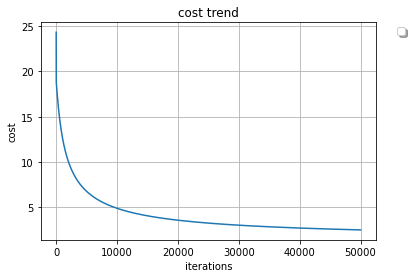

C:\Users\raja3\AppData\Local\Temp/ipykernel_7292/2479824732.py:79: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.w = np.ones(self.X.shape[1], dtype = np.float) * 0
C:\Users\raja3\AppData\Local\Temp/ipykernel_7292/2479824732.py:34: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(self.maxIteration)):


[-0.5520553   0.26666424]
    Actual  Predicted  Probability
0        1        1.0     0.999793
1        1        1.0     0.505611
2        1        1.0     0.842720
3        1        1.0     0.996260
4        1        1.0     1.000000
5        0        0.0     0.001970
6        1        1.0     0.988803
7        1        1.0     0.999998
8        1        1.0     0.982405
9        1        1.0     0.999996
10       0        0.0     0.034495
11       1        1.0     0.996329
12       1        1.0     0.999672
13       0        0.0     0.339575
14       0        0.0     0.410701
15       1        1.0     0.999999
16       0        0.0     0.145630
17       0        0.0     0.047868
18       1        1.0     0.948744
19       1        1.0     0.975863
20       1        1.0     1.000000
21       1        1.0     0.994098
22       1        1.0     0.999960
23       1        1.0     0.969832
24       1        1.0     0.999214
25       1        1.0     0.930568
26       1        1.0     0.9

  0%|          | 0/50000 [00:00<?, ?it/s]

No handles with labels found to put in legend.


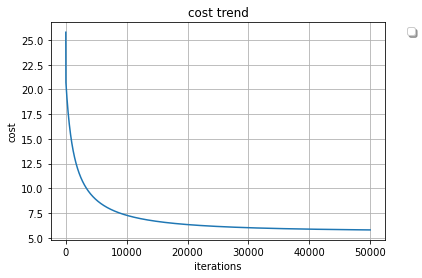

[-0.47594792  0.23071008]
    Actual  Predicted  Probability
0        1        0.0     0.183488
1        1        1.0     0.999425
2        1        1.0     0.534099
3        1        1.0     0.826991
4        1        1.0     0.992984
5        1        1.0     1.000000
6        0        0.0     0.005045
7        1        1.0     0.982024
8        1        1.0     0.999989
9        1        1.0     0.973332
10       1        1.0     0.999982
11       0        0.0     0.058665
12       1        1.0     0.993084
13       1        1.0     0.999140
14       0        0.0     0.385005
15       0        0.0     0.448041
16       1        1.0     0.999996
17       0        0.0     0.194622
18       0        0.0     0.076800
19       1        1.0     0.933725
20       1        1.0     0.965208
21       1        1.0     1.000000
22       1        1.0     0.989535
23       1        1.0     0.999862
24       1        1.0     0.957763
25       1        1.0     0.998181
26       1        1.0     0.9

In [9]:
lr.run_model()

lr2.run_model()

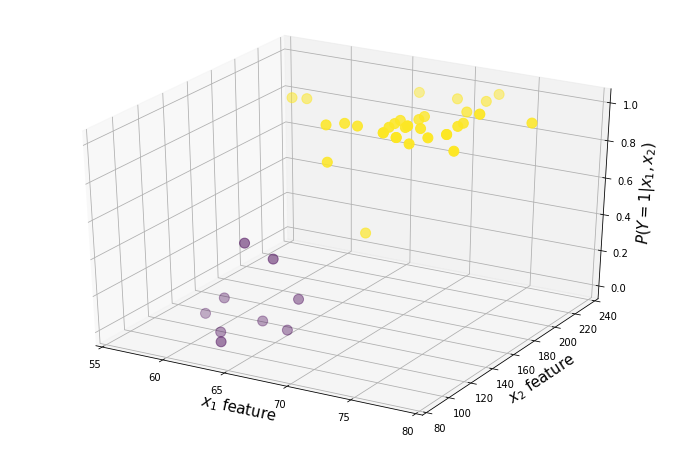

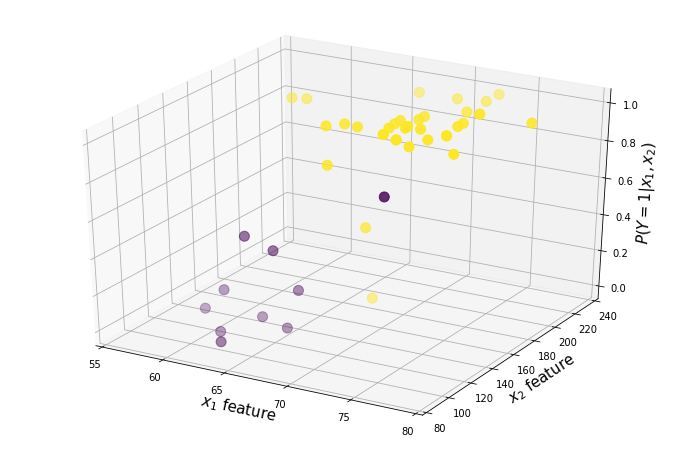

In [9]:
lr.plot()

lr2.plot()

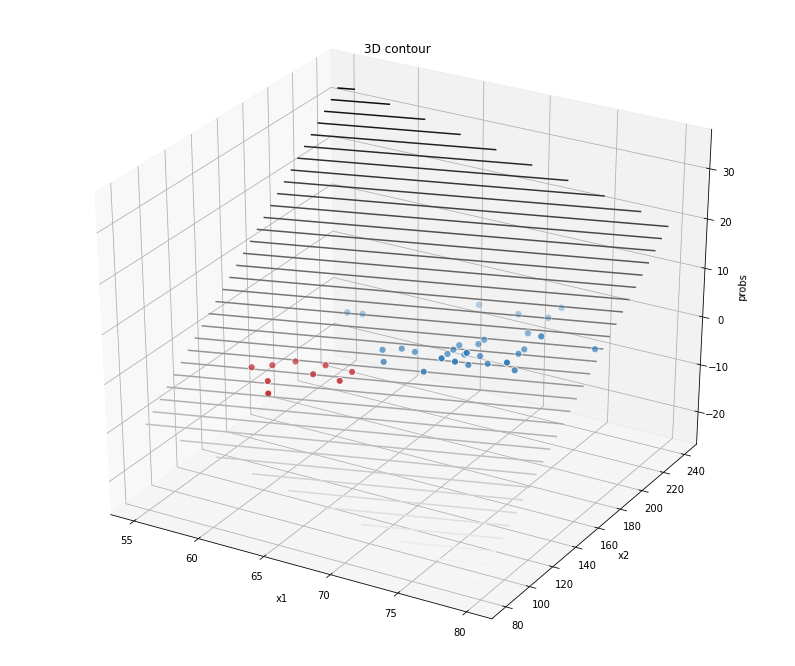

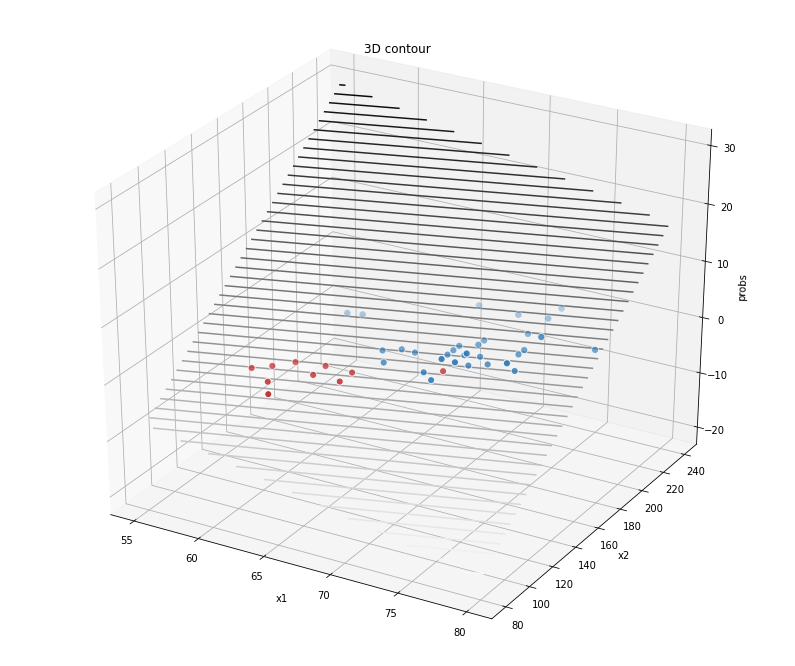

In [10]:
lr.plot3D()

lr2.plot3D()

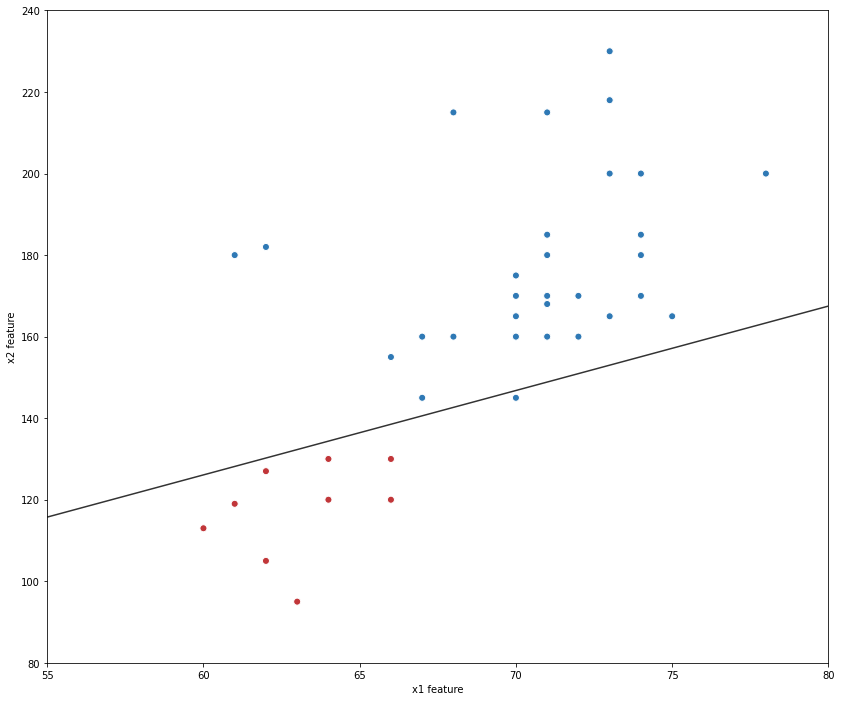

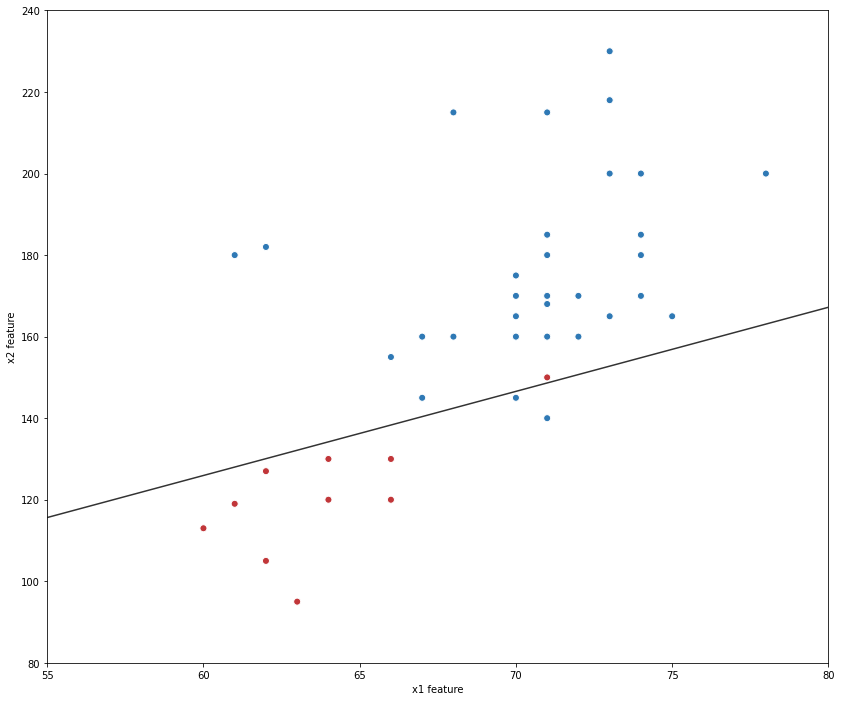

In [11]:
lr.scatterPlt()

lr2.scatterPlt()

### 2) **As the Logistic regression adjusts the weights(self.w) of the variables(x1, x2) based on the computed cost, removing the training observations would change the probability of the other trained observations based on the current cost. Also, those two points are the outliers that are misclassified by the model. Hence removing these points alters the probabilities as well as increases the Precision and recall rates.**

# 2. Naive Bayes

In [3]:
# Generate a Random Data set with two variables X1, X2 and output y with 1000 instances.
rs = np.random.RandomState(42)
X = rs.choice(2, (1000,2))
y = rs.choice(2, (1000,1)).flatten()
X

array([[0, 1],
       [0, 0],
       [0, 1],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

In [9]:
class NaiveBayes:
    def __init__(self, X, y, laplace=False, alpha = 1, gaussian=False) -> None:
        self.X = X
        self.y = y
        self.laplace = laplace
        self.alpha = alpha
        self.gaussian = gaussian
        self.d = {}
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size = 0.3, random_state  = 0)

    def fit_distribution(self, data):
        mean = np.mean(data)
        sigma = np.std(data)
        dist = norm(mean, sigma)
        return dist
    
    def probability(self, X, prior, dist1, dist2):
        return prior * dist1.pdf(X[0]) * dist2.pdf(X[1])

    def Laplace_smoothing(self, value, term):
        if term == 'n':
            return value + self.alpha
        else:
            return value + self.alpha*self.X_train.shape[1]
    
    def fit(self):
        
        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        
        self.prior_y0 = len(self.X0_train) / len(self.X)
        self.prior_y1 = len(self.X1_train) / len(self.X)
        
        if self.gaussian:
            self.dist_X0y0 = self.fit_distribution(self.X0_train[:, 0])
            self.dist_X1y0 = self.fit_distribution(self.X0_train[:, 1])
            
            self.dist_X0y1 = self.fit_distribution(self.X1_train[:, 0])
            self.dist_X1y1 = self.fit_distribution(self.X1_train[:, 1])

        elif self.laplace:
            for y in (0,1):
              for predictor in range(self.X_train.shape[1]):
                for i in np.unique(self.X_train[:, predictor], axis=0):
                    if y==0:
                        x_df = self.X0_train
                    else:
                        x_df = self.X1_train
                    if self.laplace:
                        self.d[f"{y}_{predictor}_{i}"] = self.Laplace_smoothing(len(x_df[x_df[:, predictor] == i, predictor]), 'n')/self.Laplace_smoothing(len(x_df), 'd')
                    else:
                        self.d[f"{y}_{predictor}_{i}"] = len(x_df[self.X0_train[:, predictor] == i, predictor])/len(x_df)
        else:
            return "NO Model selected."

        
    def predict(self):
        
        for sample, target in zip(self.X_test, self.y_test):

            if self.gaussian:
                py0 = self.probability(sample, self.prior_y0, self.dist_X0y0, self.dist_X1y0)
                py1 = self.probability(sample, self.prior_y1, self.dist_X0y1, self.dist_X1y1)
            
            elif self.laplace:
                py0 = self.prior_y0
                py1 = self.prior_y1
                for i in range(self.X_test.shape[1]):
                  py0 = py0 * self.d[f"0_{i}_{sample[i]}"] 
                  py1 = py1 * self.d[f"1_{i}_{sample[i]}"] 

            else:
                return "NO Model selected."

                                      
            print("P(y = 0|%s) = %.3f" % (sample, py0*100))
            print("P(y = 1|%s) = %.3f" % (sample, py1*100))
            
            print("Model predicted class {} and the truth was : {}\n".format(np.argmax([py0*100, py1*100]), target))

# Steps implemented:

**1. Generated random data set with 0,1 as required**

**2. Added Laplasce smoothing to avoid zero probability for missing combinations in training dataset**

**3. Changed Naive Bayes to account for discrete classification**

**4. This algorithm is desgined dynamically in a such way that it can handle multiple predictors with non-binary categories**

In [10]:
nb = NaiveBayes(X, y, True, 1, False)

In [11]:
nb.fit()

In [12]:
nb.predict()

P(y = 0|[1 1]) = 7.508
P(y = 1|[1 1]) = 8.746
Model predicted class 1 and the truth was : 1

P(y = 0|[1 0]) = 8.899
P(y = 1|[1 0]) = 9.051
Model predicted class 1 and the truth was : 0

P(y = 0|[0 0]) = 10.193
P(y = 1|[0 0]) = 8.647
Model predicted class 0 and the truth was : 0

P(y = 0|[0 1]) = 8.600
P(y = 1|[0 1]) = 8.355
Model predicted class 0 and the truth was : 1

P(y = 0|[0 0]) = 10.193
P(y = 1|[0 0]) = 8.647
Model predicted class 0 and the truth was : 1

P(y = 0|[1 1]) = 7.508
P(y = 1|[1 1]) = 8.746
Model predicted class 1 and the truth was : 1

P(y = 0|[0 1]) = 8.600
P(y = 1|[0 1]) = 8.355
Model predicted class 0 and the truth was : 1

P(y = 0|[1 0]) = 8.899
P(y = 1|[1 0]) = 9.051
Model predicted class 1 and the truth was : 0

P(y = 0|[1 1]) = 7.508
P(y = 1|[1 1]) = 8.746
Model predicted class 1 and the truth was : 1

P(y = 0|[0 1]) = 8.600
P(y = 1|[0 1]) = 8.355
Model predicted class 0 and the truth was : 0

P(y = 0|[1 1]) = 7.508
P(y = 1|[1 1]) = 8.746
Model predicted class 